In [10]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score


In [11]:
def read_corpus_to_dataframe(filepath):
    data = []
    with open(filepath, 'r', encoding='utf-8') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 2:
                token, label = parts
                data.append({'token': token, 'label': label})
                
    return pd.DataFrame(data)


In [12]:
df = read_corpus_to_dataframe('./data/es-en/train.conll')
print(df[:20])

         token  label
0        11:11  other
1        .....  other
2         make  lang1
3            a  lang1
4         wish  lang1
5      .......  other
6        night  lang1
7        night  lang1
8   @YiseBabee  other
9            i  lang1
10        wish  lang1
11           i  lang1
12       could  lang1
13          be  lang1
14    ignorant  lang1
15        Bout  lang1
16          to  lang1
17         get  lang1
18          my  lang1
19         Fat  lang1


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

In [14]:
# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['token'], df['label'], test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=1, max_df=0.5, ngram_range=(1,3))),
    ('svm', SVC(kernel='linear'))
])

In [15]:
# Step 4: Model training
start_time = time.time()
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.5, ngram_range=(1, 3))),
                ('svm', SVC(kernel='linear'))])

In [16]:
# Step 5: Model evaluation
predictions = pipeline.predict(X_test)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Training and evaluation took {elapsed_time:.2f} seconds.")
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

Training and evaluation took 913.66 seconds.
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        56
           1       1.00      0.25      0.40         4
           2       0.98      0.83      0.90     16042
           3       0.98      0.86      0.91     22751
           4       0.00      0.00      0.00        11
           5       0.88      0.54      0.66      1025
           6       0.66      1.00      0.79     10723
           7       0.00      0.00      0.00        33

    accuracy                           0.87     50645
   macro avg       0.56      0.43      0.46     50645
weighted avg       0.90      0.87      0.88     50645

Accuracy: 0.8717938592161122


/Users/lydia/miniconda3/envs/extra-info/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lydia/miniconda3/envs/extra-info/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lydia/miniconda3/envs/extra-info/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

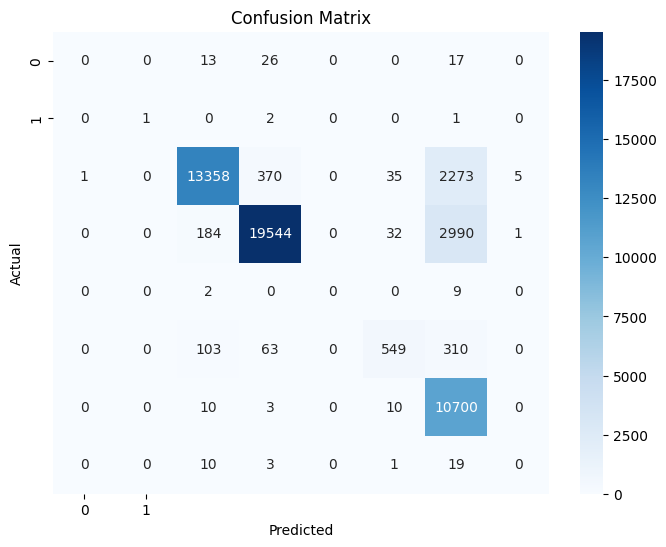

In [18]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
